In [2]:
import os
from IPython.display import display, Image, clear_output
import time
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn import preprocessing

### Display Image

image path: ./augmentation/images/BME_00119_jpg_large_orange_cone_0_100.jpg


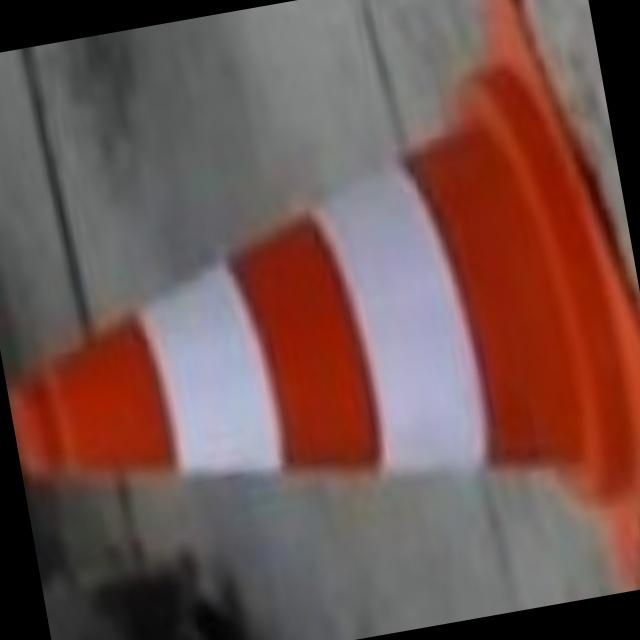

KeyboardInterrupt: 

In [5]:
folder_path = './augmentation/images' 
#'../yolov5/data/train/images/'

image_paths = [
    os.path.join(folder_path, file)
    for file in os.listdir(folder_path)
    if (
        file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif'))
        and '_large_orange_cone' in os.path.basename(file)
    )
]
image_paths.sort()

def display_images(image_paths, width=400, height=400):
    for image_path in image_paths:
        print("image path:", image_path)
        img = Image.open(image_path)
        # display(img.resize((width, height)))
        display(img)
        time.sleep(2)
        clear_output(wait=True)
display_images(image_paths, width=800, height=600)

### Soucre 1 image label match

In [ ]:
def read_txt_file_to_dataframe(file_path):
    try:
        with open(file_path, 'r') as file:
            lines = file.readlines()
            data = [line.strip().split() for line in lines]
            df = pd.DataFrame(data, columns=['class', 'x_center', 'y_center', 'upd_width', 'upd_height'])
            return df
    except FileNotFoundError:
        print(f"Error: File not found at path {file_path}")
    except Exception as e:
        print(f"Error: An unexpected error occurred - {str(e)}")

# Example usage:
# eco_00065_png.rf.6cde72b196d5dec00a1aea3e502e44e6.txt
txt_file_path1 = "./data_v1/data_v1/data_1/labels/eco_00065.txt"
df1 = read_txt_file_to_dataframe(txt_file_path1)

txt_file_path2 = "./data_v1/data_v1/data_1/labels/eco_00065_png.rf.6cde72b196d5dec00a1aea3e502e44e6.txt"
df2 = read_txt_file_to_dataframe(txt_file_path2)

display(HTML('<table><tr>{}</tr></table>'.format(
    '<td>{}</td><td>{}</td>'.format(df1.to_html(), df2.to_html())
)))
df1['x_center'] = df1['x_center'].astype(float)
df1['y_center'] = df1['y_center'].astype(float)
df1['upd_width'] = df1['upd_width'].astype(float)
df1['upd_height'] = df1['upd_height'].astype(float)

df2['x_center'] = df2['x_center'].astype(float)
df2['y_center'] = df2['y_center'].astype(float)
df2['upd_width'] = df2['upd_width'].astype(float)
df2['upd_height'] = df2['upd_height'].astype(float)

def display_image(image_path):
    img = plt.imread(image_path)
    # Create a figure and axis
    fig, ax = plt.subplots()
    height, width, channels = img.shape
    # Display the image
    return ax, img, height, width

# Example usage:
image_path = "data_v1/data_v1/data_1/images/eco_00065.png"
ax, img, height1, width1 = display_image(image_path)
ax.imshow(img)

img_width = width1
img_height = height1
# Plot rectangles on the image using the normalized coordinates
for _, row in df2.iterrows():
    x_center = row['x_center']
    y_center = row['y_center']
    width = row['upd_width']
    height = row['upd_height']

    # Convert normalized coordinates back to pixel values
    x_center_px = x_center * img_width    #df1['width'][0]
    y_center_px = y_center * img_height   #df1['height'][0]
    width_px = width * img_width          #df1['width'][0]
    height_px = height * img_height       #df1['height'][0]

    # Create a rectangle patch
    rect = patches.Rectangle(
        (x_center_px - width_px/2, y_center_px - height_px/2),
        width_px, height_px,
        linewidth=2, edgecolor='r', facecolor='none'
    )

    # Add the rectangle patch to the axis
    ax.add_patch(rect)

# Show the image with rectangles
plt.show()

### Soucre 2 image label match

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def read_txt_file_to_dataframe(file_path):
    try:
        with open(file_path, 'r') as file:
            lines = file.readlines()
            data = [line.strip().split() for line in lines]
            df = pd.DataFrame(data, columns=['class', 'x_center', 'y_center', 'upd_width', 'upd_height'])
            return df
    except FileNotFoundError:
        print(f"Error: File not found at path {file_path}")
    except Exception as e:
        print(f"Error: An unexpected error occurred - {str(e)}")

# Example usage:
# eco_00065_png.rf.6cde72b196d5dec00a1aea3e502e44e6.txt
txt_file_path1 = "./data/labels/eco_00065_png.txt"
df1 = read_txt_file_to_dataframe(txt_file_path1)
df1
print(df1)

df1['x_center'] = df1['x_center'].astype(float)
df1['y_center'] = df1['y_center'].astype(float)
df1['upd_width'] = df1['upd_width'].astype(float)
df1['upd_height'] = df1['upd_height'].astype(float)


def display_image(image_path):
    img = plt.imread(image_path)
    # Create a figure and axis
    fig, ax = plt.subplots()
    # Display the image
    return ax, img

# Example usage:
image_path = "data/images/eco_00065_png.png"
ax, img = display_image(image_path)
ax.imshow(img)


img_width = 1560
img_height = 1000
# Plot rectangles on the image using the normalized coordinates
for _, row in df1.iterrows():
    x_center = row['x_center']
    y_center = row['y_center']
    width = row['upd_width']
    height = row['upd_height']

    # Convert normalized coordinates back to pixel values
    x_center_px = x_center * img_width    #df1['width'][0]
    y_center_px = y_center * img_height   #df1['height'][0]
    width_px = width * img_width          #df1['width'][0]
    height_px = height * img_height       #df1['height'][0]

    # Create a rectangle patch
    rect = patches.Rectangle(
        (x_center_px - width_px/2, y_center_px - height_px/2),
        width_px, height_px,
        linewidth=2, edgecolor='r', facecolor='none'
    )

    # Add the rectangle patch to the axis
    ax.add_patch(rect)

# Show the image with rectangles
plt.show()